# Binarization of a lattice 

In [158]:
# Path to tbs

import sys
import os

sys.path.append(os.path.dirname('../'))

In [159]:
# imports
from tbs.dismantlable import random_dismantlable_lattice, draw_dismantlable_lattice_to_pyplot

## Creation of a random totally balanced lattice

In [163]:
N_ELEMENTS = 10
random_lattice = random_dismantlable_lattice(range(N_ELEMENTS))

In [164]:
import matplotlib

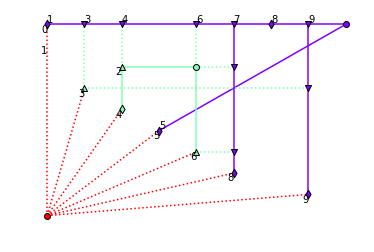

In [165]:
draw_dismantlable_lattice_to_pyplot(random_lattice, matplotlib.pyplot, matplotlib.cm.rainbow)
matplotlib.pyplot.show()

## Lattice binarization

The random lattice is not binary in principle. We want to binarize it.

In [167]:
print(random_lattice.is_binary())
random_lattice.binarize()
print(random_lattice.is_binary())

False
True


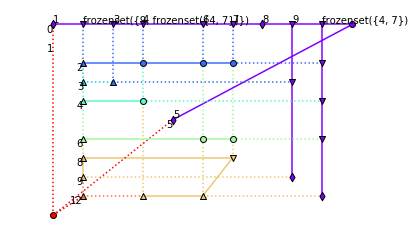

In [168]:
draw_dismantlable_lattice_to_pyplot(random_lattice, matplotlib.pyplot, matplotlib.cm.rainbow)
matplotlib.pyplot.show()

## Decomposition of a lattice

A binary lattice can be decomposed into a sequence of trees corresponding to its vertices. The initial lattice has to be atomistic to begin the process so that all objects are atoms of the lattice.

In [169]:
print(random_lattice.is_atomistic())
random_lattice.make_atomistic()
print(random_lattice.is_binary(), random_lattice.is_atomistic())

False
True True


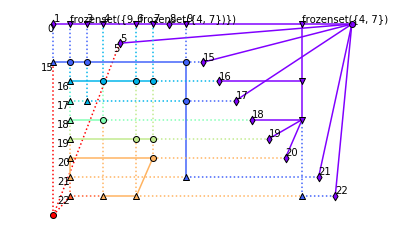

In [170]:
draw_dismantlable_lattice_to_pyplot(random_lattice, matplotlib.pyplot, matplotlib.cm.rainbow)
matplotlib.pyplot.show()

In [171]:
from tbs.dismantlable import DecompositionBTB

In [172]:
decomposition = DecompositionBTB.build_from_binary_lattice(random_lattice)

The decomposition trees are represented as follows :
    - a red edge correspond to a non constructive edge i.e one vertex is included in the other
    - a green edge is the next edge to be merged
    - a green vertex is the vertex created this step

In [173]:
from tbs.dismantlable import draw_tree_decomposition_to_pyplot

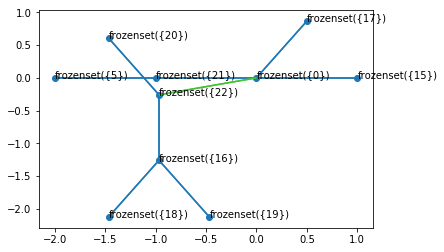

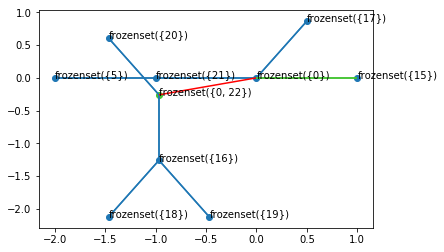

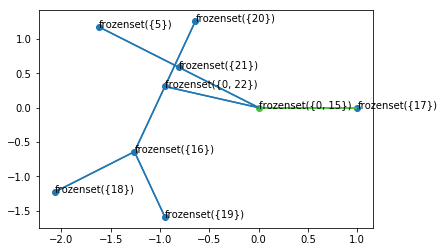

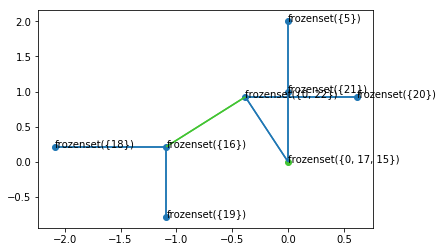

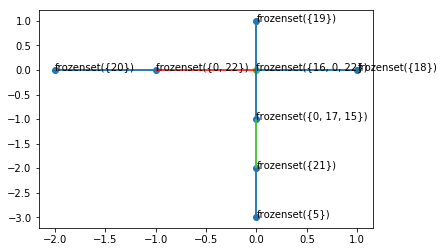

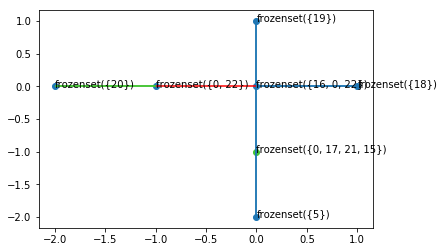

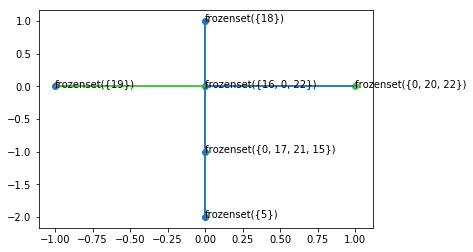

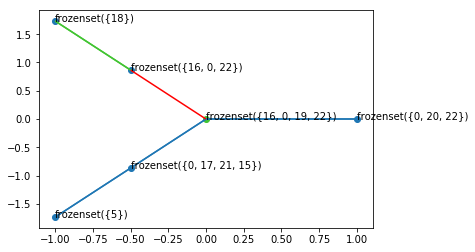

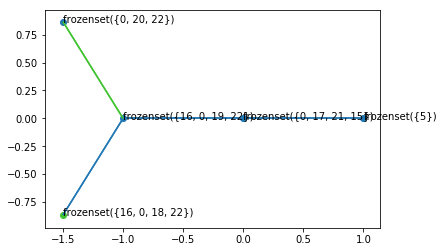

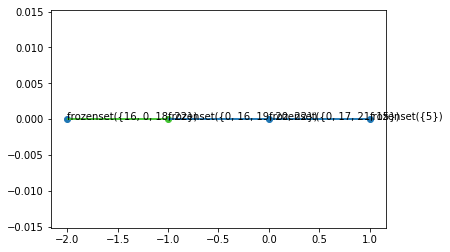

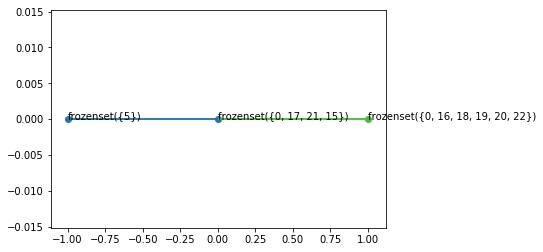

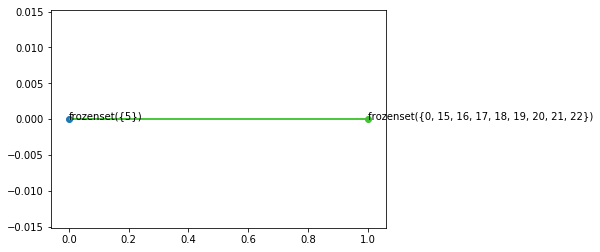

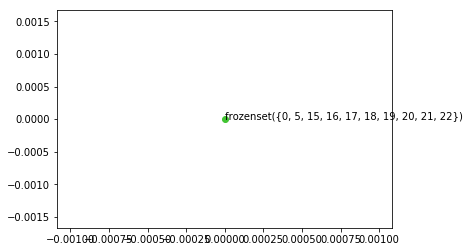

In [174]:
for i in range(len(decomposition.history)):
    draw_tree_decomposition_to_pyplot(decomposition, i, matplotlib.pyplot)
    matplotlib.pyplot.draw()

In [175]:
decomposition.order #the order edges were merged

[(frozenset({0}), frozenset({22})),
 (frozenset({0}), frozenset({15})),
 (frozenset({0, 15}), frozenset({17})),
 (frozenset({16}), frozenset({0, 22})),
 (frozenset({0, 15, 17}), frozenset({21})),
 (frozenset({20}), frozenset({0, 22})),
 (frozenset({0, 16, 22}), frozenset({19})),
 (frozenset({0, 16, 22}), frozenset({18})),
 (frozenset({0, 20, 22}), frozenset({0, 16, 19, 22})),
 (frozenset({0, 16, 18, 22}), frozenset({0, 16, 19, 20, 22})),
 (frozenset({0, 15, 17, 21}), frozenset({0, 16, 18, 19, 20, 22})),
 (frozenset({0, 15, 16, 17, 18, 19, 20, 21, 22}), frozenset({5}))]

## Construction of a lattice via decomposition trees

In [151]:
# imports
from tbs.graph import random_tree

The decomposition process needs a tree to begin with.

In [152]:
TREE_SIZE = 10
random_tree = random_tree(range(TREE_SIZE))

In [153]:
decomposition = DecompositionBTB.build_from_tree(random_tree)

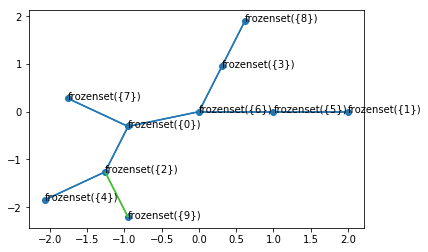

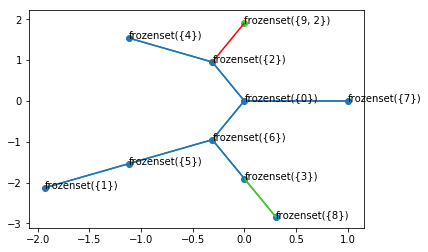

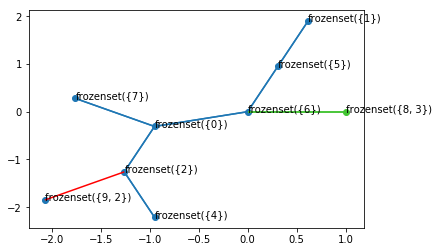

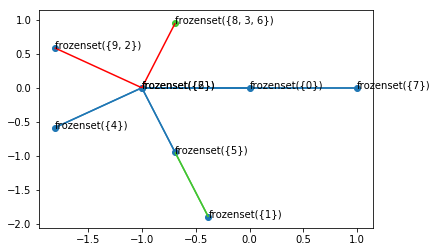

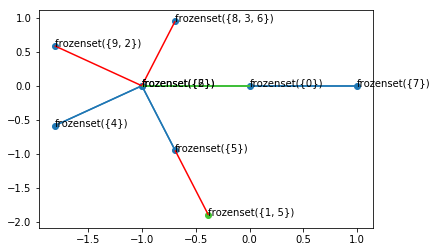

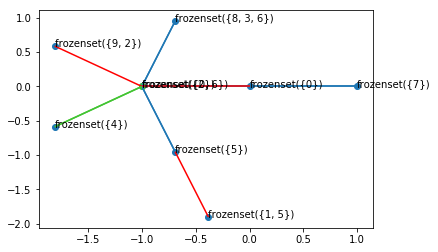

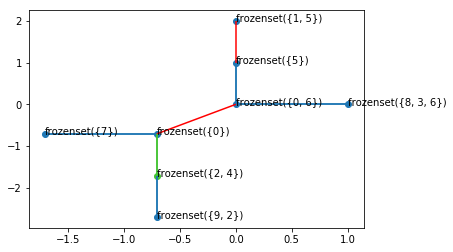

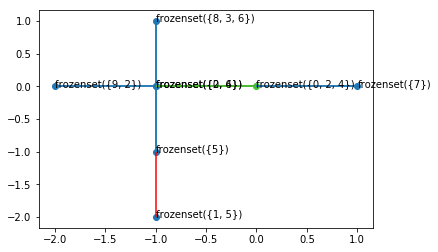

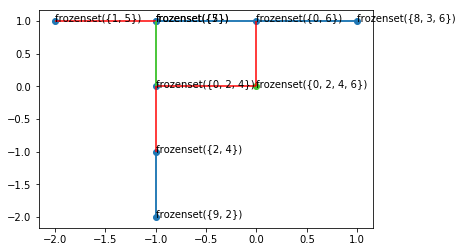

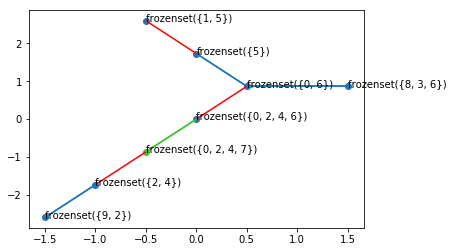

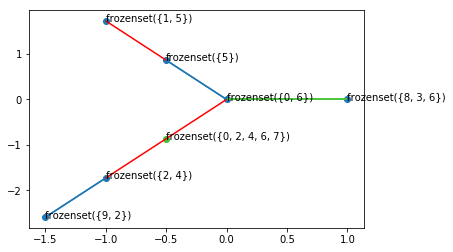

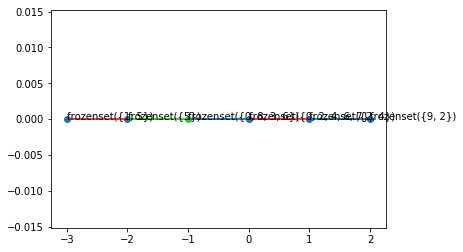

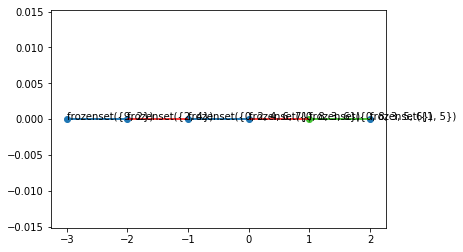

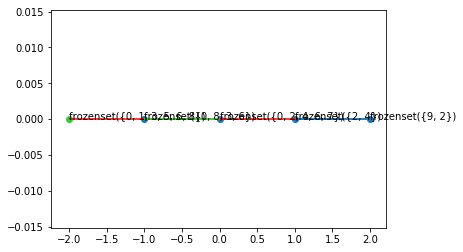

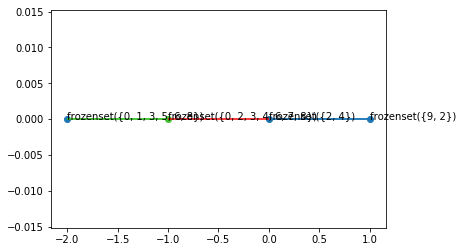

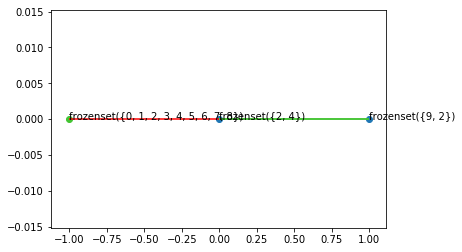

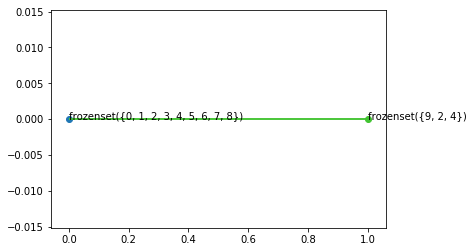

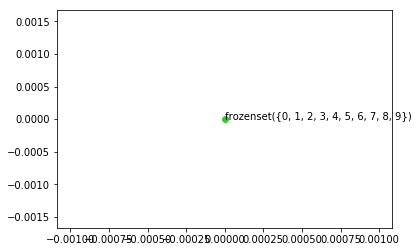

In [154]:
for i in range(len(decomposition.history)):
    draw_tree_decomposition_to_pyplot(decomposition, i, matplotlib.pyplot)
    matplotlib.pyplot.draw()

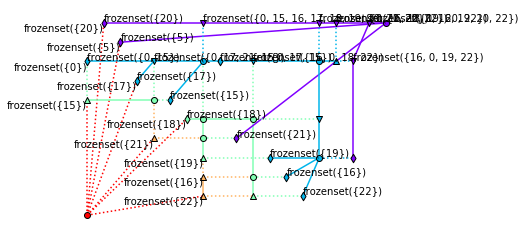

In [176]:
associated_lattice = tbs.dismantlable.DismantlableLattice(decomposition.hase_diagram)
draw_dismantlable_lattice_to_pyplot(associated_lattice, matplotlib.pyplot, matplotlib.cm.rainbow)

In [177]:
print(associated_lattice.is_binary())

True


In [178]:
decomposition.order

[(frozenset({0}), frozenset({22})),
 (frozenset({0}), frozenset({15})),
 (frozenset({0, 15}), frozenset({17})),
 (frozenset({16}), frozenset({0, 22})),
 (frozenset({0, 15, 17}), frozenset({21})),
 (frozenset({20}), frozenset({0, 22})),
 (frozenset({0, 16, 22}), frozenset({19})),
 (frozenset({0, 16, 22}), frozenset({18})),
 (frozenset({0, 20, 22}), frozenset({0, 16, 19, 22})),
 (frozenset({0, 16, 18, 22}), frozenset({0, 16, 19, 20, 22})),
 (frozenset({0, 15, 17, 21}), frozenset({0, 16, 18, 19, 20, 22})),
 (frozenset({0, 15, 16, 17, 18, 19, 20, 21, 22}), frozenset({5}))]